In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
room_occupancy_estimation = fetch_ucirepo(id=864) 
  
# data (as pandas dataframes) 
X = room_occupancy_estimation.data.features 
y = room_occupancy_estimation.data.targets 


In [81]:
#Dataset
X.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0


In [82]:
#Size and shape
print('Number of rows:',X.shape[0])
print('Number of columns:',X.shape[1])

Number of rows: 10129
Number of columns: 18


In [83]:
#Number of null values
def find_null_percent(df):
    
    # Creating a data frame with percent of null values in each column
    null_percent = (df.isnull().mean()*100).reset_index().rename(columns = {'index': 'column_name', 0:'percent_of_null_values'})
    return null_percent

find_null_percent(X)

,column_name,percent_of_null_values
0,Date,0.0
1,Time,0.0
2,S1_Temp,0.0
3,S2_Temp,0.0
4,S3_Temp,0.0
5,S4_Temp,0.0
6,S1_Light,0.0
7,S2_Light,0.0
8,S3_Light,0.0
9,S4_Light,0.0


We have no null values in our dataset

In [84]:
X.dtypes

Date             object
Time             object
S1_Temp         float64
S2_Temp         float64
S3_Temp         float64
S4_Temp         float64
S1_Light          int64
S2_Light          int64
S3_Light          int64
S4_Light          int64
S1_Sound        float64
S2_Sound        float64
S3_Sound        float64
S4_Sound        float64
S5_CO2            int64
S5_CO2_Slope    float64
S6_PIR            int64
S7_PIR            int64
dtype: object

In [85]:
(X.describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


In [86]:
X.nunique()

Date                7
Time            10129
S1_Temp            24
S2_Temp            69
S3_Temp            29
S4_Temp            27
S1_Light           68
S2_Light           82
S3_Light          177
S4_Light           75
S1_Sound          231
S2_Sound          185
S3_Sound          258
S4_Sound          106
S5_CO2            186
S5_CO2_Slope     1579
S6_PIR              2
S7_PIR              2
dtype: int64

Lets explore date and time to understand the data distribution and how it might affect our result

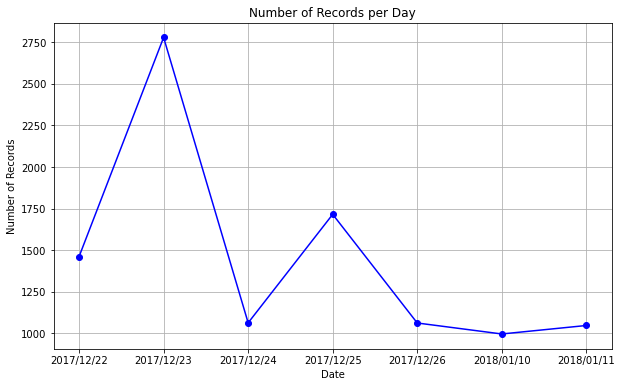

In [87]:
# Group by date and count the number of records for each day
daily_counts = X.groupby('Date').size().reset_index(name='count')
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_counts['Date'], daily_counts['count'], marker='o', linestyle='-', color='b')
plt.title('Number of Records per Day')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

In [88]:
#Categorizing time of the day
X['datetime'] = pd.to_datetime(X['Date'] +' '+ X['Time'])

# Define a function to categorize time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Extract hour from datetime column and apply categorize_time_of_day function
X['time_of_day'] = X['datetime'].dt.hour.apply(categorize_time_of_day)

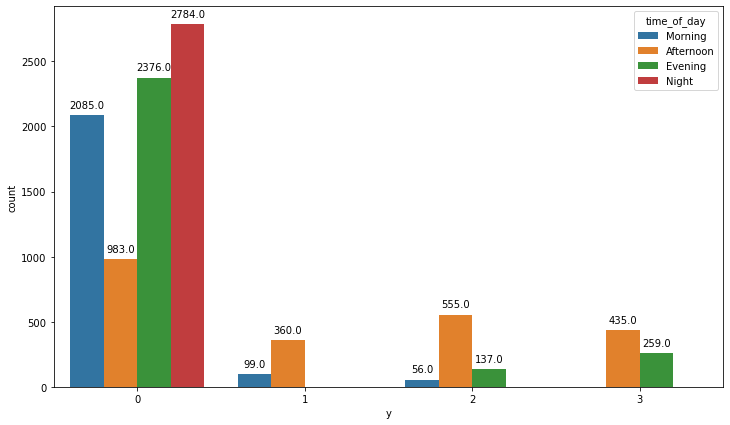

In [90]:
X['y'] = y['Room_Occupancy_Count']
#Classification of records based on time of day
plt.figure(figsize=(12,7))
ax = sns.countplot(data = X,x = 'y', hue = 'time_of_day', hue_order = ['Morning','Afternoon','Evening','Night'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()